In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys

from streamlit import columns

print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [75]:
import pandas as pd

raw_data_x = [[3.3935, 2.3313],
[3.1101, 1.7815],
[1.3438, 3.3684],
[3.5823, 4.6792],
[2.2804, 2.8670],
[7.4234, 4.6965],
[5.7451, 3.5340],
[9.1722, 2.5111],
[7.7928, 3.4241],
[7.9398, 0.7916]]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]
data = pd.DataFrame(raw_data_x)

In [77]:
data['y'] = raw_data_y

In [78]:
data.columns = ['x1','x2','y']

In [79]:
data

,x1,x2,y
0,3.3935,2.3313,0
1,3.1101,1.7815,0
2,1.3438,3.3684,0
3,3.5823,4.6792,0
4,2.2804,2.8670,0
5,7.4234,4.6965,1
6,5.7451,3.5340,1
7,9.1722,2.5111,1
8,7.7928,3.4241,1
9,7.9398,0.7916,1


In [2]:
import random

In [3]:
# 生成一个x在[0,10],y在[0,5],保留四位小数的数组
x = np.array([round(random.uniform(0.0,10.0),4),round(random.uniform(0.0,5.0),4)])
x

array([7.4387, 4.4552])

In [98]:
plt.rcParams['font.sans-serif'] = 'STsong'

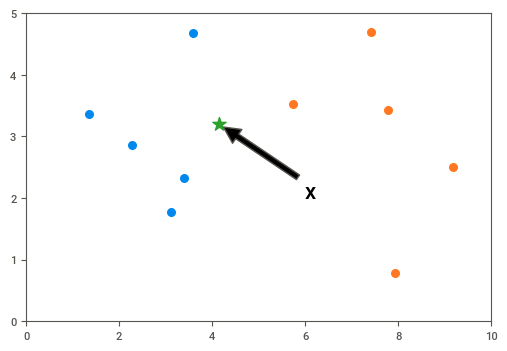

In [100]:
plt.figure(figsize=(6,4),dpi=100)
plt.scatter(data[data['y']== 0 ]['x1'],data[data['y']==0]['x2'],s=30,)
plt.scatter(data[data['y']== 1 ]['x1'],data[data['y']==1]['x2'],s=30,)
plt.annotate('x',xy=(x[0],x[1]),xytext=(6,2),arrowprops=dict(facecolor='black',shrink=0.05,lw=1))
plt.scatter(x[0],x[1],marker='*',s=100)
plt.xlim(0,10)
plt.ylim(0,5)
plt.show()

In [103]:
dis = ((data[['x1','x2']] - x) ** 2).sum(axis=1).apply(lambda i:np.sqrt(i)).sort_values()
index = dis.iloc[:3].index# 找到距离目标点最近的三个点

In [107]:
data.iloc[index]

,x1,x2,y
0,3.3935,2.3313,0
3,3.5823,4.6792,0
6,5.7451,3.5340,1


In [125]:
#定义一个得到临近点各颜色的函数
def KNN_classfify(K,data,x):
    dis = ((data[['x1','x2']] - x) ** 2).sum(axis=1).apply(lambda x:np.sqrt(x)).sort_values()
    index = dis.iloc[:K].index
    result = data.loc[index]['y'].value_counts().to_dict()
    return f"得到是0颜色的个数为:{result.get(0,0)},得到的是1颜色的个数为:{result.get(1,0)}"

In [126]:
KNN_classfify(3,data,x)

'得到是0颜色的个数为:3,得到的是1颜色的个数为:0'

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
iris_dataset = load_iris()

In [ ]:
iris_dataset['data']#每种花的种类
iris_dataset['target']# 每种花的标签
iris_dataset['target_names']# 每种花的名字
iris_dataset['feature_names']# 特征的名称,花萼长度

In [14]:
data = pd.DataFrame(iris_dataset['data'],columns=iris_dataset['feature_names'])
data['label'] = iris_dataset['target']
# 通过映射,让标签映射为姓名
data['name'] = data['label'].map(dict(zip(range(3),iris_dataset['target_names'].tolist())))

In [15]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


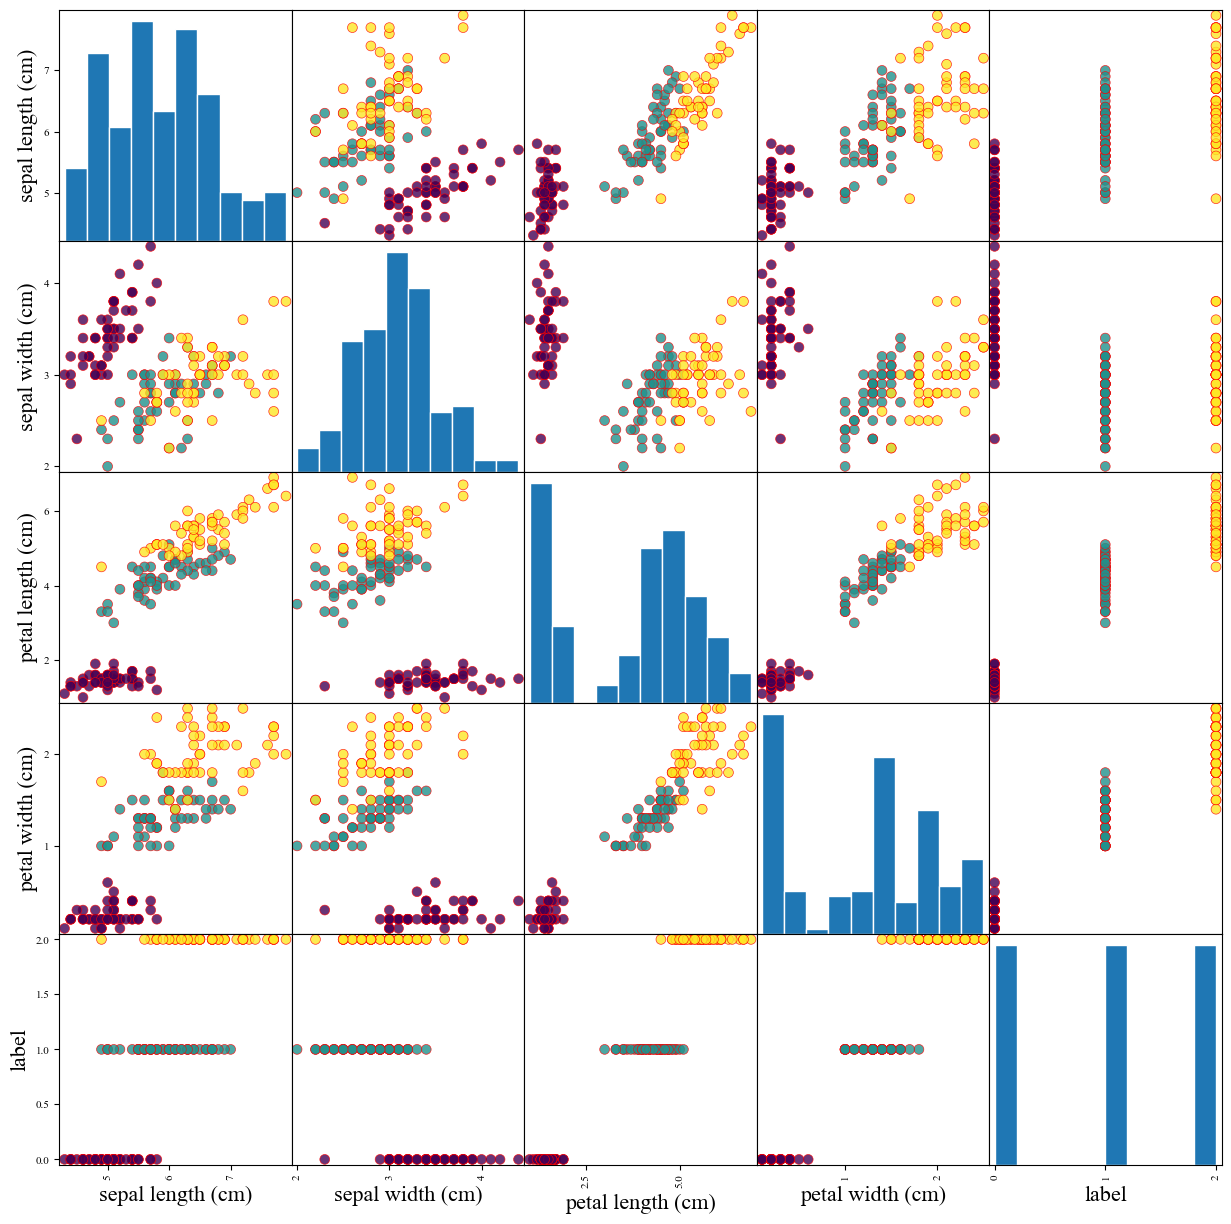

In [11]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
pd.plotting.scatter_matrix(data,c= data['label'],figsize=(15,15),marker='o',
                           edgecolors = 'red',linewidth=0.5,
                           hist_kwds={'bins':10,'edgecolor':'white','linewidth':1},s=50,alpha=0.8
                           )
plt.show()

In [16]:
# 训练集和测试集的划分
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:4],
    data['label'],#用来当y两个数据集的参数
    test_size=0.2,#百分之20给X_test,y_test
    random_state=1210,
    stratify=None,)

In [19]:
print(X_train.shape)
X_train.head()

(120, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
44,5.1,3.8,1.9,0.4
77,6.7,3.0,5.0,1.7
92,5.8,2.6,4.0,1.2
57,4.9,2.4,3.3,1.0


In [20]:
print(X_test.shape)
X_test.head()

(30, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
40,5.0,3.5,1.3,0.3
68,6.2,2.2,4.5,1.5
50,7.0,3.2,4.7,1.4
96,5.7,2.9,4.2,1.3
24,4.8,3.4,1.9,0.2


In [21]:
y_train.shape

(120,)

In [30]:
import sweetviz as sv
my_report = sv.compare([pd.concat([X_train,y_train],axis=1),'训练集数据'],
                       [pd.concat([X_test,y_test],axis=1),'测试集数据'],
                       )
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
D:\Anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=T

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 模型建立

- 'weights' 权重设置,uniform是均等权重,distance是不均等权重,距离近的点比距离远的点影响要大一点
- 'algorithm':快速搜索算法,'auto','ball

In [135]:
knn = KNeighborsClassifier(n_neighbors=5,# 默认值是5,默认邻居数量
                           n_jobs=-1, # 并行处理设置,设置为-1,那么所有的CPU的所有内核的cores都并行工作
                           weights='distance', # 权重设置,uniform是均等权重,distance是不均等权重
                           algorithm = 'auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski'
                           )

In [136]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [138]:
# 模型训练
knn.fit(X_train,y_train)
y_pred=  knn.predict(X_test)
print(f'{np.mean(y_pred == y_test): .4f}')
print(knn.score(X_test,y_test))

 1.0000
1.0


### 调参,寻找最合适的参数
- 遍历寻找

In [47]:
best_score = 0.0
best_k = 1
best_method=''
for method in ['uniform','distance']:
    for k in range(1,11):
        knn_cif = KNeighborsClassifier(n_neighbors=k,# 默认值是5,默认邻居数量
                               n_jobs=-1, # 并行处理设置,设置为-1,那么所有的CPU的所有内核的cores都并行工作
                               weights=method
                               )
        knn_cif.fit(X_train,y_train)
        score=  knn_cif.score(X_test,y_test)
        if score >best_score:
            best_score = score
            best_k=k
            best_method=method
print(f"best_k是:{best_k},best_method是:{best_method},best_score是:{best_score}")      

best_k是:5,best_method是:uniform,best_score是:1.0


- 网格搜索

In [22]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)],
        
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
knn_model= KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(knn_model,param_grid=param_grid)

In [25]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [26]:
# 得到最好的参数组合
best_estimator = grid_search.best_estimator_
# 得到最好的分数
best_score = grid_search.best_score_

In [27]:
print(best_estimator)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6, p=5, weights='distance')


In [28]:
#通过上述得到最好的参数然后进行建模
knn = KNeighborsClassifier(n_neighbors=6,# 默认值是5,默认邻居数量
                           n_jobs=-1, # 并行处理设置,设置为-1,那么所有的CPU的所有内核的cores都并行工作
                           weights='distance', # 权重设置,uniform是均等权重,distance是不均等权重
                           algorithm = 'auto',
                           leaf_size=30,
                           p=5,
                           metric='minkowski'
                           )

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6, p=5, weights='distance')

In [30]:
y_pred = knn.predict(X_test)

In [158]:
xtest = X_test
xtest['real_label'] = y_test
xtest['pred_label'] = y_pred

In [31]:
np.mean(y_pred == y_test)

1.0